In [1]:
import pandas as pd
import os
import glob
from tqdm import tqdm
import math
from rake_nltk import Rake
from transformers import pipeline
import warnings

import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import time

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# import plotly.express as px
from sklearn.cluster import KMeans

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

/home/krish/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to /home/krish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/krish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/krish/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Preparing Data

In [101]:
final_df = pd.DataFrame(columns=["reviews"])

In [102]:
import time
start_time = time.time()

path = r"reviews/*.csv"

def preprocess_text(text):
    #Function taken from (https://stackoverflow.com/a/71095469/14204371)

    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)

    stopwords_dict = {word: 1 for word in stopwords.words("english")}
    text = " ".join([word for word in text.split() if word not in stopwords_dict])

    text = ' '.join([lemmatizer.lemmatize(w) for w in text.split()])
    return text


for fname in glob.glob(path):
    print(fname)

    df = pd.read_csv(fname)
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    df["reviews"] = df["reviews"].apply(preprocess_text)

    remove_index = []
    sentiment_score=[]
    for i in range(len(df)):
        try:
            sentiment_score.append(sentiment_pipeline(df.iloc[i].values[0])[0]['label'])
        except:
            remove_index.append(i)
    sentiment_dict = {'sentiment': sentiment_score}
    df.drop(remove_index, inplace=True)
    df.reset_index(drop=True, inplace=True)

    df = pd.concat([df, pd.DataFrame(sentiment_dict)], axis=1)
    final_df = pd.concat([final_df, df], axis=0, ignore_index=True)
    
print("Total Time taken {} s".format(time.time()-start_time))

reviews/cardekhoReviews.csv
reviews/nexonTeamBHP.csv
reviews/tigor_ev.csv
reviews/carwale_nexon.csv
reviews/hyundaiKonaTeamBHP.csv
reviews/hyundai_kona_reviews.csv
reviews/TataNexonCardekhoReviews.csv
reviews/nexonIssues.csv
reviews/carwale_hyundai_kona.csv
Total Time taken 23.16224980354309 s


In [3]:
df = pd.read_csv("final_df.csv")

In [141]:
criterias = ['exterior|interior|quality|comfortable|comfort|stylish|silent|sound', 
'charge|charging|charger', 'performance|efficiency|efficient|overheating', 
'range|mileage', 'battery', 'cost|price|affordable|maintenance|budget|cheaper|overpriced',  'safety|safest', 
'dealer|service', 'pollution|environment|futuristic']

In [14]:
df["quality"] = np.zeros(len(df))
pos_quality = df[df["sentiment"] == "POSITIVE"]["reviews"].apply(lambda x: 1 if re.findall("exterior|interior|quality|comfortable|comfort|stylish|silent|sound", x) else 0)
df.loc[pos_quality.index.values, 'quality'] = pos_quality


neg_quality = df[df["sentiment"] == "NEGATIVE"]["reviews"].apply(lambda x: -1 if re.findall("exterior|interior|quality|comfortable|comfort|stylish|silent|sound", x) else 0)
df.loc[neg_quality.index.values, 'quality'] = neg_quality

In [19]:
col = "charging"
df[col] = np.zeros(len(df))
pos_ = df[df["sentiment"] == "POSITIVE"]["reviews"].apply(lambda x: 1 if re.findall("charge|charging|charger", x) else 0)
df.loc[pos_.index.values, col] = pos_


neg_ = df[df["sentiment"] == "NEGATIVE"]["reviews"].apply(lambda x: -1 if re.findall("charge|charging|charger", x) else 0)
df.loc[neg_.index.values, col] = neg_

In [21]:
col = "efficiency"
df[col] = np.zeros(len(df))
pos_ = df[df["sentiment"] == "POSITIVE"]["reviews"].apply(lambda x: 1 if re.findall("performance|efficiency|efficient|overheating", x) else 0)
df.loc[pos_.index.values, col] = pos_


neg_ = df[df["sentiment"] == "NEGATIVE"]["reviews"].apply(lambda x: -1 if re.findall("performance|efficiency|efficient|overheating", x) else 0)
df.loc[neg_.index.values, col] = neg_

In [24]:
col = "range"
df[col] = np.zeros(len(df))
pos_ = df[df["sentiment"] == "POSITIVE"]["reviews"].apply(lambda x: 1 if re.findall("range|mileage", x) else 0)
df.loc[pos_.index.values, col] = pos_


neg_ = df[df["sentiment"] == "NEGATIVE"]["reviews"].apply(lambda x: -1 if re.findall("range|mileage", x) else 0)
df.loc[neg_.index.values, col] = neg_

In [25]:
col = "battery"
df[col] = np.zeros(len(df))
pos_ = df[df["sentiment"] == "POSITIVE"]["reviews"].apply(lambda x: 1 if re.findall("battery", x) else 0)
df.loc[pos_.index.values, col] = pos_


neg_ = df[df["sentiment"] == "NEGATIVE"]["reviews"].apply(lambda x: -1 if re.findall("battery", x) else 0)
df.loc[neg_.index.values, col] = neg_

In [26]:
col = "cost"
df[col] = np.zeros(len(df))
pos_ = df[df["sentiment"] == "POSITIVE"]["reviews"].apply(lambda x: 1 if re.findall("cost|price|affordable|maintenance|budget|cheaper|overpriced", x) else 0)
df.loc[pos_.index.values, col] = pos_


neg_ = df[df["sentiment"] == "NEGATIVE"]["reviews"].apply(lambda x: -1 if re.findall("cost|price|affordable|maintenance|budget|cheaper|overpriced", x) else 0)
df.loc[neg_.index.values, col] = neg_

In [27]:
col = "safety"
df[col] = np.zeros(len(df))
pos_ = df[df["sentiment"] == "POSITIVE"]["reviews"].apply(lambda x: 1 if re.findall("safety|safest", x) else 0)
df.loc[pos_.index.values, col] = pos_


neg_ = df[df["sentiment"] == "NEGATIVE"]["reviews"].apply(lambda x: -1 if re.findall("safety|safest", x) else 0)
df.loc[neg_.index.values, col] = neg_

In [28]:
col = "service"
df[col] = np.zeros(len(df))
pos_ = df[df["sentiment"] == "POSITIVE"]["reviews"].apply(lambda x: 1 if re.findall("dealer|service", x) else 0)
df.loc[pos_.index.values, col] = pos_


neg_ = df[df["sentiment"] == "NEGATIVE"]["reviews"].apply(lambda x: -1 if re.findall("dealer|service", x) else 0)
df.loc[neg_.index.values, col] = neg_

In [29]:
col = "environment"
df[col] = np.zeros(len(df))
pos_ = df[df["sentiment"] == "POSITIVE"]["reviews"].apply(lambda x: 1 if re.findall("pollution|environment|futuristic", x) else 0)
df.loc[pos_.index.values, col] = pos_


neg_ = df[df["sentiment"] == "NEGATIVE"]["reviews"].apply(lambda x: -1 if re.findall("pollution|environment|futuristic", x) else 0)
df.loc[neg_.index.values, col] = neg_

In [34]:
cols =list(df.columns[2:].values)
print(cols)

index = df.index.values
remove_index = []

for idx in index:
    if np.all(df[cols].iloc[idx].values == 0):
        remove_index.append(idx)

['quality', 'charging', 'efficiency', 'range', 'battery', 'cost', 'safety', 'service', 'environment']


In [37]:
df.drop(remove_index, inplace=True)
df.reset_index(drop=True, inplace=True)

# KeyBert

In [13]:
from keybert import KeyBERT
kw_model = KeyBERT(model="all-mpnet-base-v2")

Downloading: 100%|██████████████████████████████████████████████████████████████████████| 1.18k/1.18k [00:00<00:00, 323kB/s]
Downloading: 100%|█████████████████████████████████████████████████████████████████████████| 190/190 [00:00<00:00, 50.2kB/s]
Downloading: 100%|█████████████████████████████████████████████████████████████████████| 10.1k/10.1k [00:00<00:00, 2.48MB/s]
Downloading: 100%|█████████████████████████████████████████████████████████████████████████| 116/116 [00:00<00:00, 25.3kB/s]
Downloading: 100%|██████████████████████████████████████████████████████████████████████| 39.3k/39.3k [00:00<00:00, 126kB/s]
Downloading: 100%|██████████████████████████████████████████████████████████████████████████| 349/349 [00:00<00:00, 127kB/s]
Downloading: 100%|███████████████████████████████████████████████████████████████████████| 438M/438M [00:34<00:00, 12.8MB/s]
Downloading: 100%|███████████████████████████████████████████████████████████████████████| 53.0/53.0 [00:00<00:00, 16.8kB/s]


In [9]:
keywords = kw_model.extract_keywords(final_df['reviews'].values[0], final_df['keywords'].values[0])

In [ ]:
for i in range(len(final_df)):
    df.loc[i, "reviews"] = df

In [126]:
df.loc[0, "reviews"].replace, '')

TypeError: replace() argument 1 must be str, not list

In [131]:
re.sub("car|evs|ev|electric|tata|nexon|hyundai|kona","", df.loc[0, "reviews"])

'Best  for day-to-day work and for long rides. It has a great performance and smooth driving, the good thing is that its running cost is very low and service cost is also low as compared to other brand s. '

In [136]:
from collections import Counter

keywords = []
for i in final_df[final_df['sentiment'] == 'POSITIVE'].index.values:
    text = re.sub("car|evs|ev|electric|tata|nexon|hyundai|kona|km|india|th|buy","", final_df.loc[i, 'reviews'])
    result = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english')
    for res in result:
        key, score = res
        keywords.append(key)

positive = dict(Counter(keywords))        

In [ ]:
sorted(zip(positive.values(), positive.keys()))[::-1]

In [138]:
from collections import Counter

keywords = []
for i in final_df[final_df['sentiment'] == 'NEGATIVE'].index.values:
    text = re.sub("car|evs|ev|electric|tata|nexon|hyundai|kona|km|india|th|buy","", final_df.loc[i, 'reviews'])
    result = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english')
    for res in result:
        key, score = res
        keywords.append(key)

negatives = dict(Counter(keywords))        

In [ ]:
sorted(zip(negatives.values(), negatives.keys()))[::-1]

In [ ]:
# mileage, range, dealer, battery, service, service, charge

In [324]:
# final_df[final_df['sentiment'] == 'NEGATIVE']['reviews'].values

# Wordcloud

In [116]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

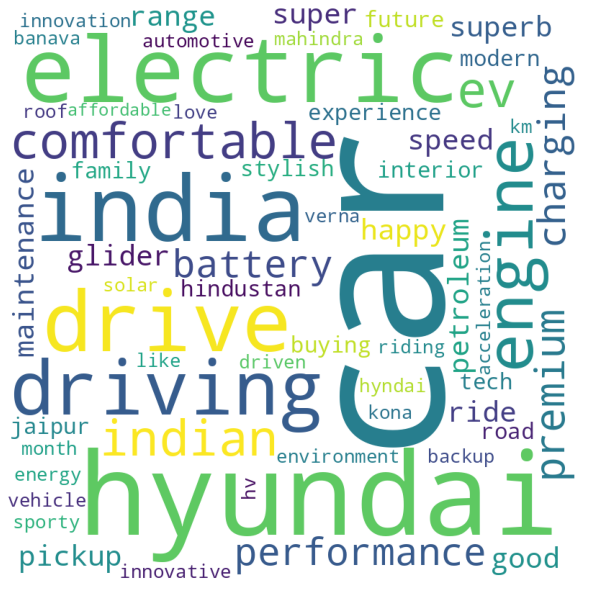

In [119]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(positive) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

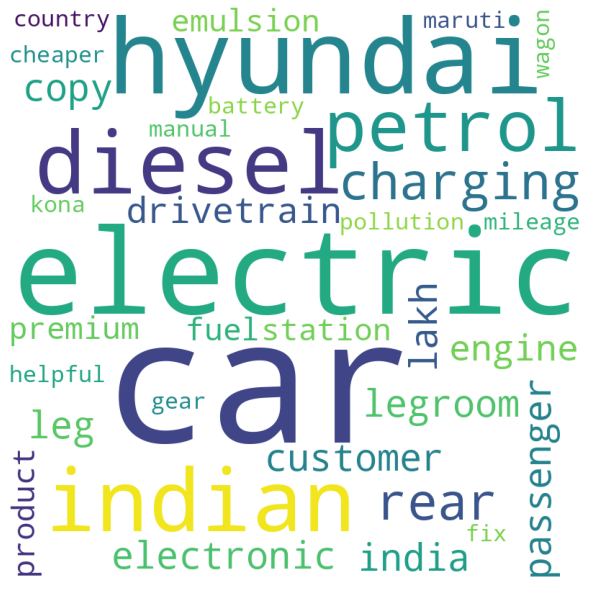

In [118]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(negatives) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Segmentation

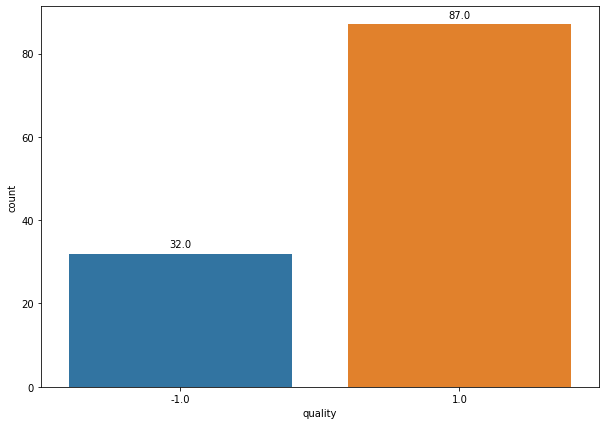

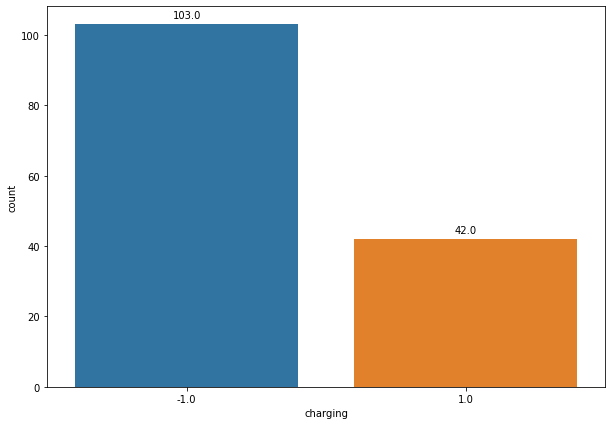

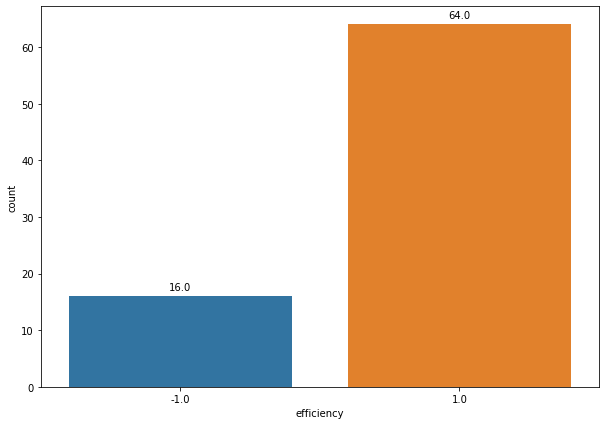

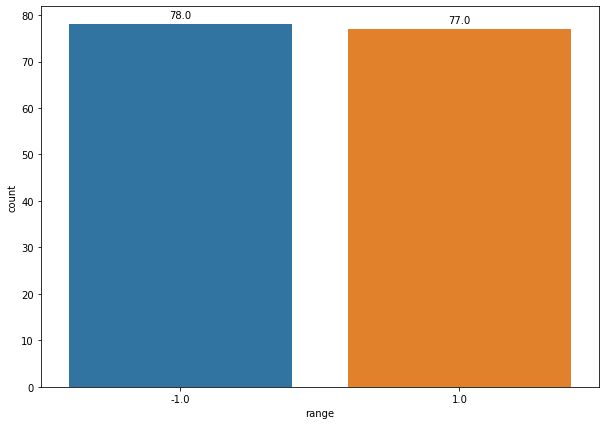

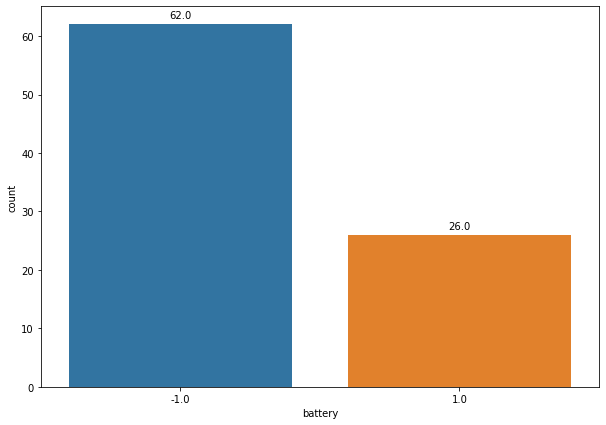

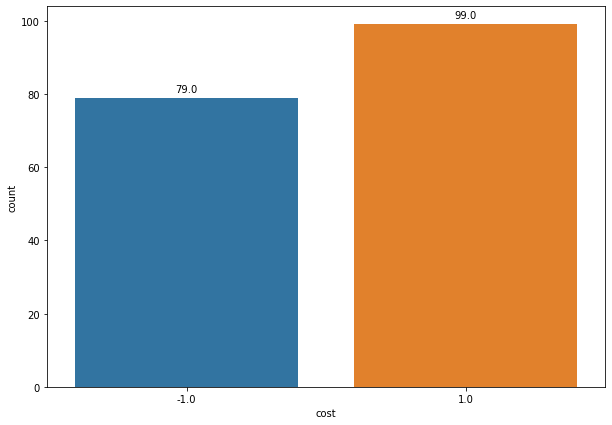

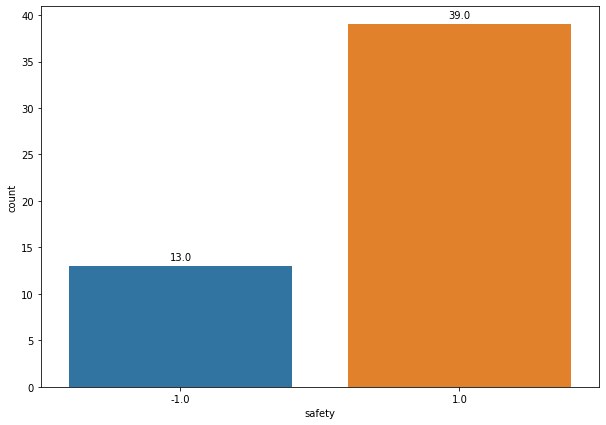

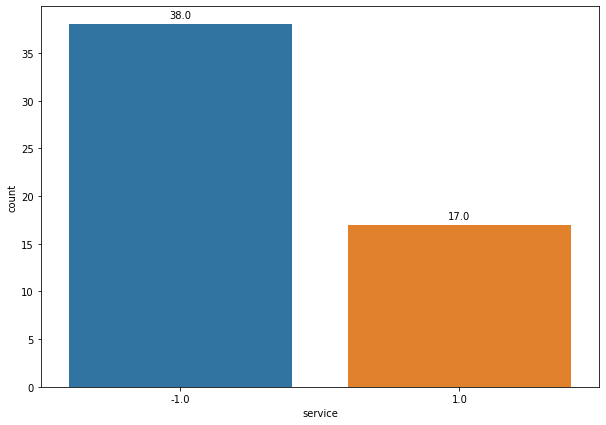

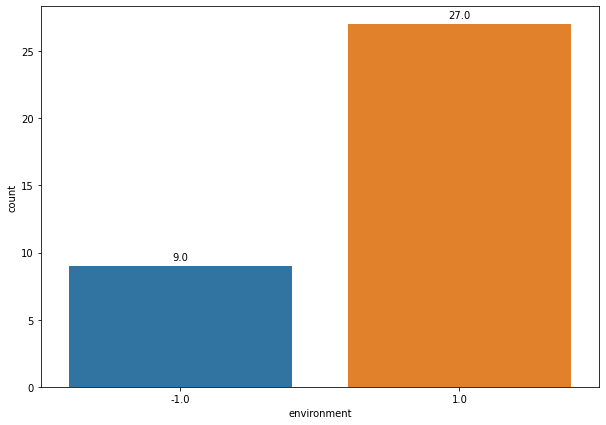

In [40]:
cols = list(df.columns[2:].values) 


for col in cols:
    plt.figure(figsize=(10, 7))
    
    splot = sns.countplot(df[df[col] != 0][col])
    for p in splot.patches:
                   splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 
    plt.show(block=False)                                         # So plot dont overwrite when print them 

**Conclusions**

* People concerns for EV's are regarding service, battery, cost and charge.

* People seem to be very postive about comfort, performance, quality, safety and mileage of EV'.s

* For range people have mixed opinions, people agreeing and disagreeing are almost the same.

## Principal Components Analysis


In [41]:
columns = df.columns[3:].values
values = df[columns].values

In [42]:
pca = PCA()

pca.fit_transform(values)
std = pca.components_.std(axis=0)
cumsumProportions = pca.explained_variance_ratio_.cumsum()

for idx in range(len(columns)):
    print("column: {} \n Standard Deviation: {} \n Proportion of Variance: {} \n Cumulative Proportion: {} \n\n".
    format(columns[idx], std[idx], pca.explained_variance_ratio_[idx], cumsumProportions[idx]))

column: charging 
 Standard Deviation: 0.35075863262840096 
 Proportion of Variance: 0.4147973415348532 
 Cumulative Proportion: 0.4147973415348532 


column: efficiency 
 Standard Deviation: 0.34135815205535985 
 Proportion of Variance: 0.14979855927132468 
 Cumulative Proportion: 0.5645959008061778 


column: range 
 Standard Deviation: 0.33859625469660853 
 Proportion of Variance: 0.10616556898227918 
 Cumulative Proportion: 0.670761469788457 


column: battery 
 Standard Deviation: 0.3500087474900724 
 Proportion of Variance: 0.09320856582749978 
 Cumulative Proportion: 0.7639700356159568 


column: cost 
 Standard Deviation: 0.29945214970658907 
 Proportion of Variance: 0.07231503251624981 
 Cumulative Proportion: 0.8362850681322066 


column: safety 
 Standard Deviation: 0.28355024798774403 
 Proportion of Variance: 0.06184300556438179 
 Cumulative Proportion: 0.8981280736965884 


column: service 
 Standard Deviation: 0.34412777426798036 
 Proportion of Variance: 0.0592800983662

* The following command returns the factor loadings.
* The loadings indicate how the original variables are combined to form principal components.
* Loadings guide the interpretation of principal components.

In [43]:
pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(columns))], index=columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
charging,-0.476340,0.417060,0.558107,-0.444857,0.250808,-0.034288,-0.062980,0.147420
efficiency,-0.219475,-0.037052,0.058575,0.653837,0.679711,-0.186923,-0.111592,-0.100620
range,-0.533147,0.456929,-0.693423,0.040738,-0.122912,-0.025881,0.089602,-0.025887
battery,-0.270338,0.099666,0.437592,0.556908,-0.620708,0.021414,0.172058,0.002917
cost,-0.574076,-0.764554,-0.040307,-0.196889,-0.026048,-0.075479,0.196490,-0.022806
safety,-0.109399,-0.101807,-0.041381,-0.006487,-0.261426,-0.338372,-0.888653,0.058043
service,-0.151539,-0.091742,-0.031418,0.106492,0.067025,0.904889,-0.323417,0.168455
environment,-0.055747,0.051440,0.091861,-0.112451,-0.034472,0.154076,-0.114178,-0.967056


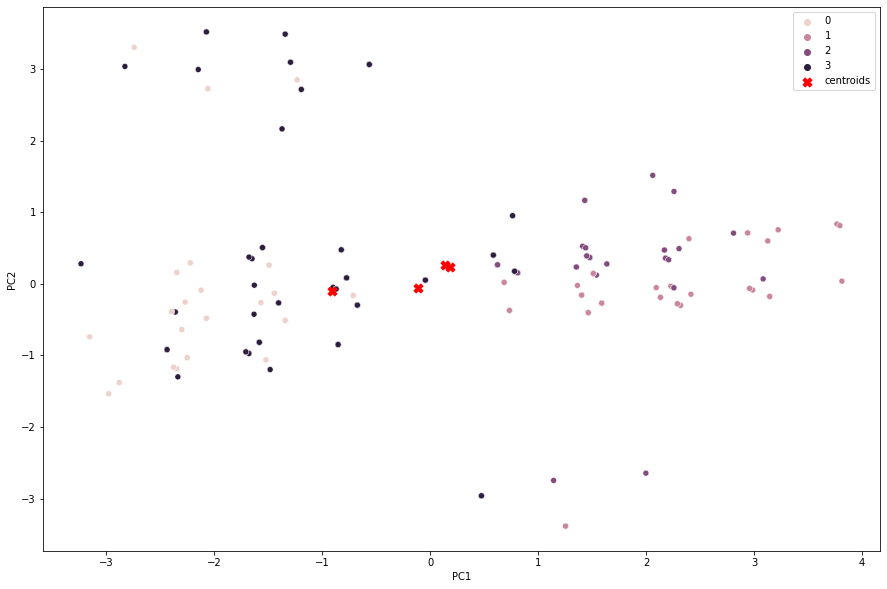

In [45]:
plt.figure(figsize=(15, 10))
kmeans = KMeans(4, random_state=0).fit(values)
scaled_data = StandardScaler().fit_transform(values)
pca = PCA(n_components=8)
pca_data = pca.fit_transform(scaled_data)

pf = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(len(columns))])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', c="r", s=80, label='centroids')
plt.legend()
plt.show()

In [46]:
pca = PCA()
components = pca.fit_transform(values)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, title='Principal components analysis of the fast food data set')

for i, feature in enumerate(columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

NameError: name 'px' is not defined

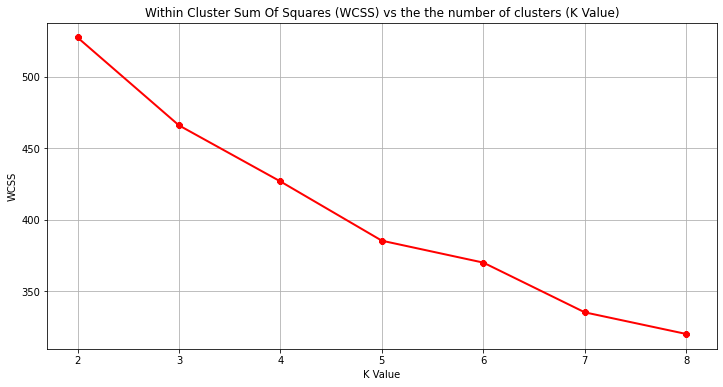

In [90]:
wcss = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(2,9),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(2,9,1))
plt.title('Within Cluster Sum Of Squares (WCSS) vs the the number of clusters (K Value)')
plt.ylabel("WCSS")
plt.show()

**Silhouette Score**

For n_clusters = 2 The average silhouette_score is : 0.27966304206567244
For n_clusters = 3 The average silhouette_score is : 0.21982802092535852
For n_clusters = 4 The average silhouette_score is : 0.21266459843412183
For n_clusters = 5 The average silhouette_score is : 0.22933311526894173
For n_clusters = 6 The average silhouette_score is : 0.24630040671641656
For n_clusters = 7 The average silhouette_score is : 0.24528839834653918
For n_clusters = 8 The average silhouette_score is : 0.25885064715336337
For n_clusters = 9 The average silhouette_score is : 0.25787701137085794


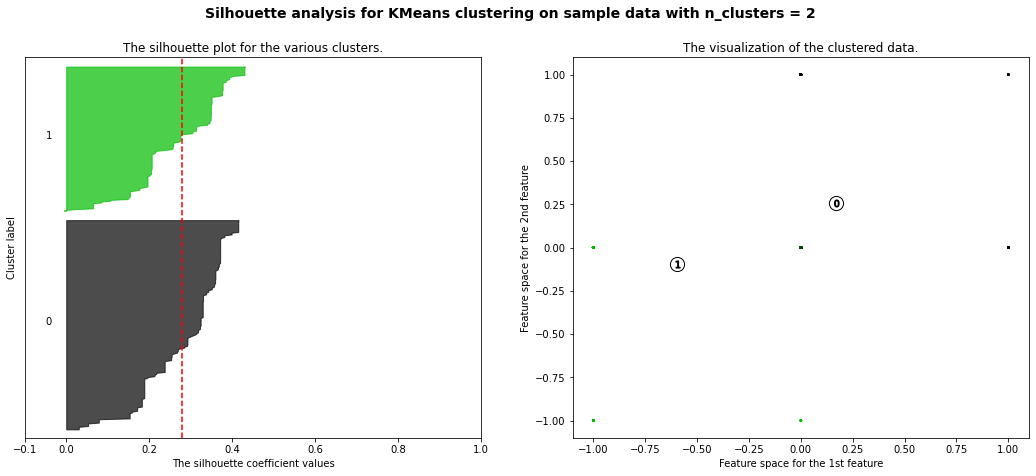

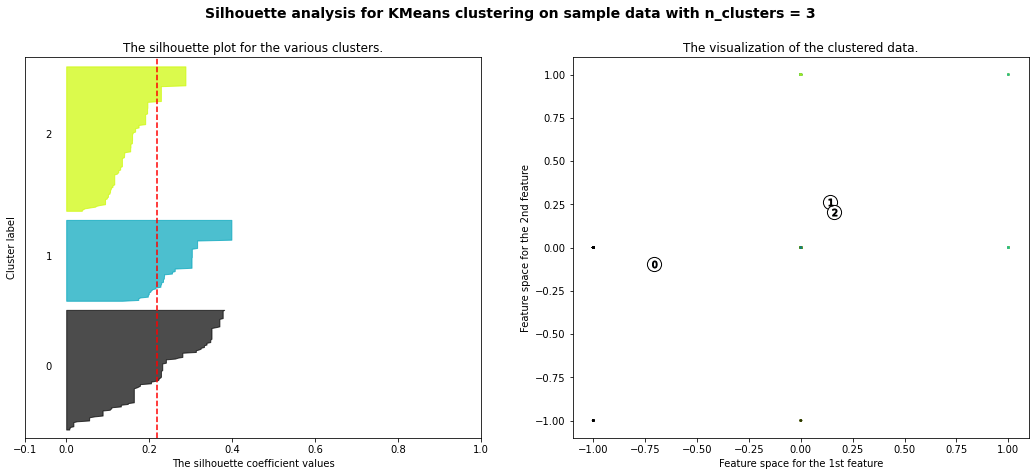

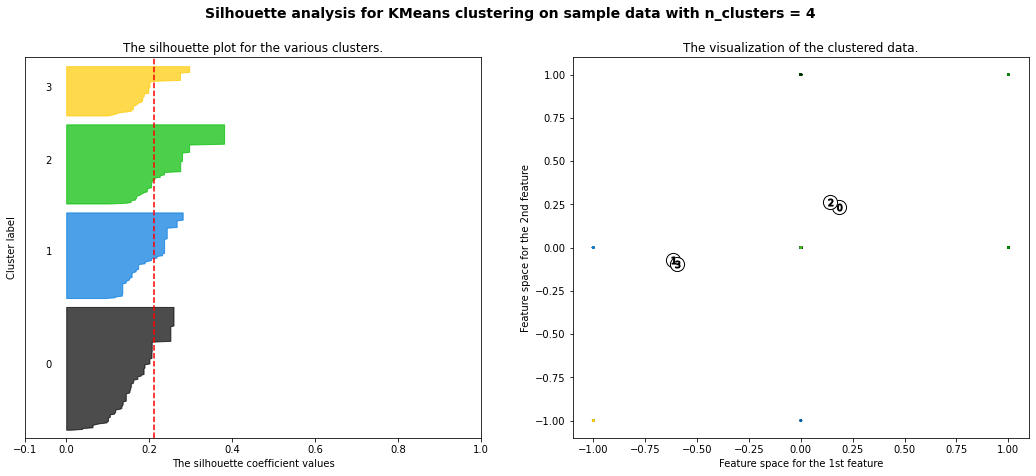

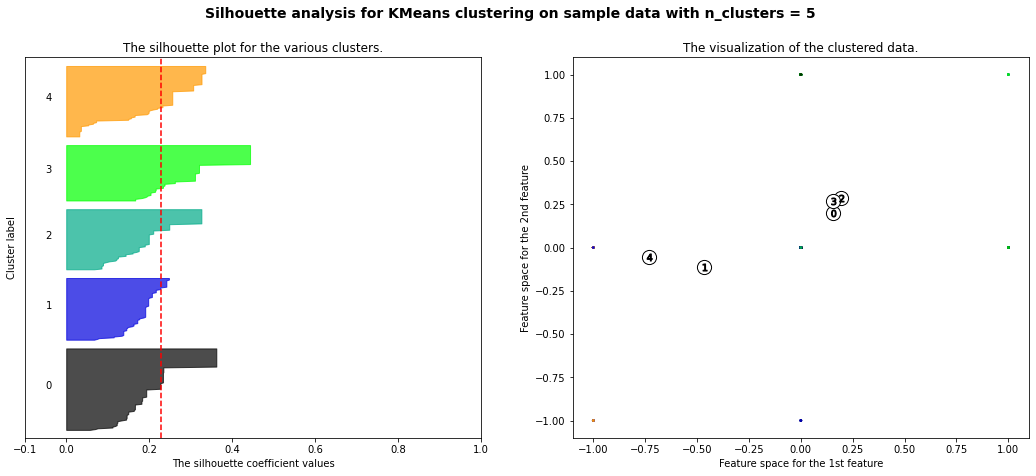

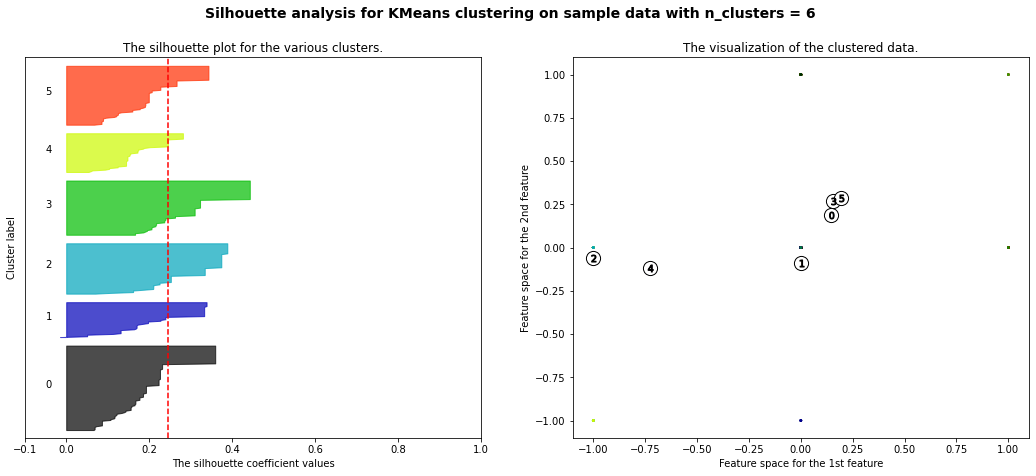

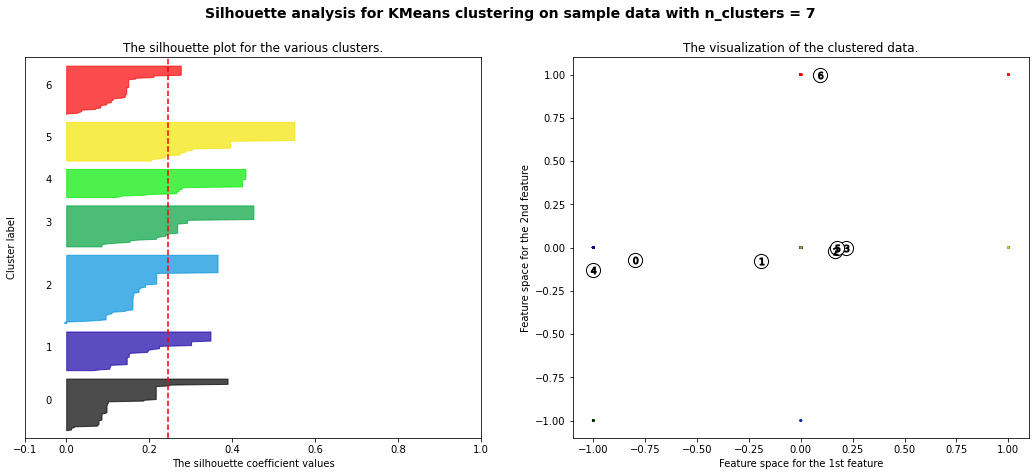

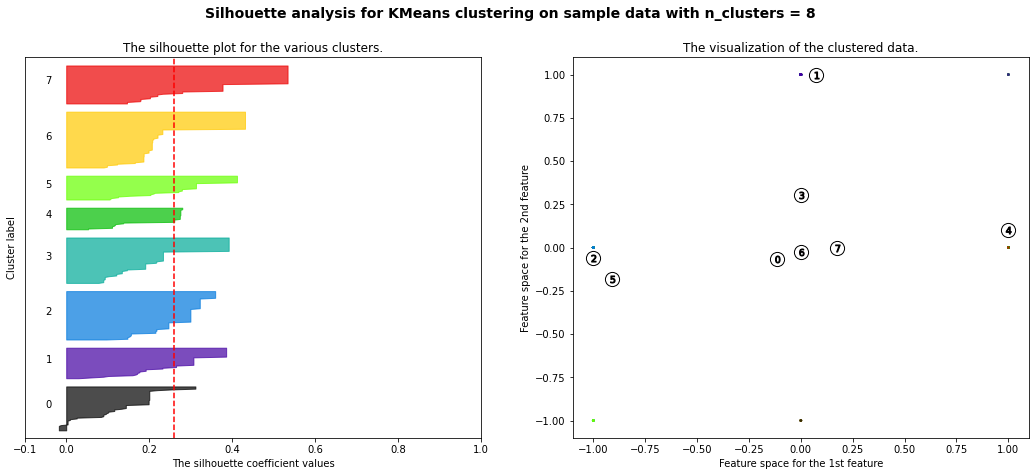

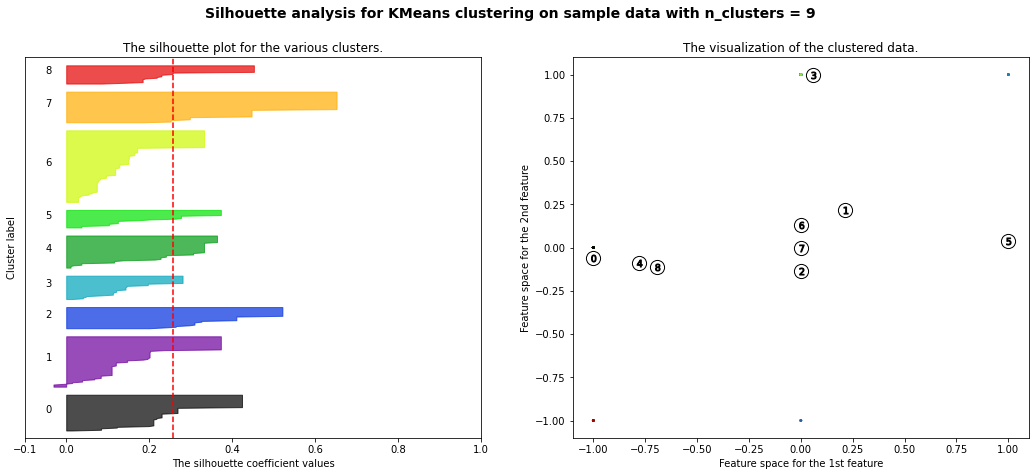

In [57]:
X = values

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = np.arange(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [49]:
rng = np.random.default_rng()

kmeans = KMeans(n_clusters=9)
X = rng.choice(values, 200, axis=0, replace=False)
kmeans.fit(X)

KMeans(n_clusters=9)

`Global stability of k-means segmentation solutions for the fast food data set`

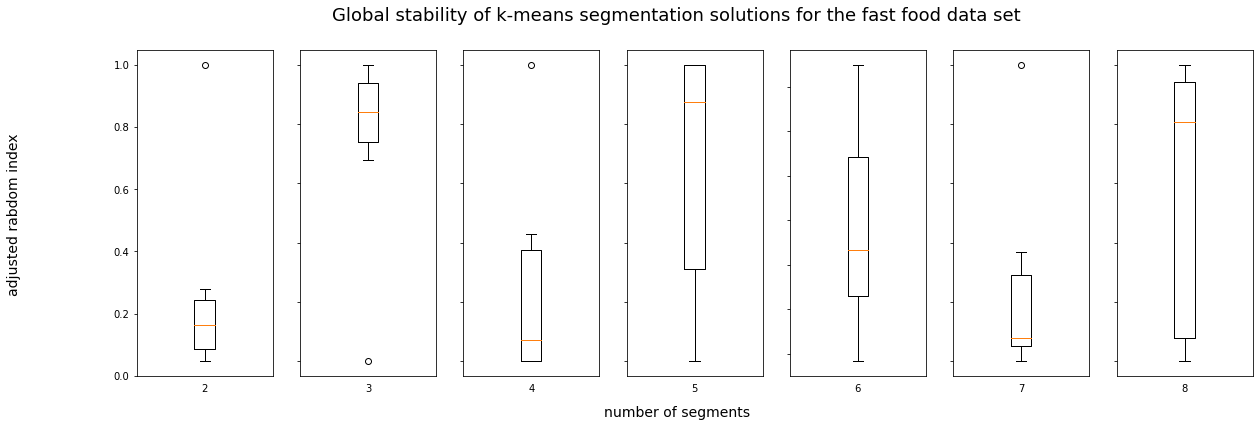

In [50]:
fig, axes = plt.subplots(1, 7, sharex=True, figsize=(20,6))

fig.suptitle('Global stability of k-means segmentation solutions for the fast food data set', fontsize=18)

i=0


for ax in axes.flatten():
    ax.boxplot(kmeans.cluster_centers_[i])
    i+=1
    ax.label_outer()
    ax.set_xticks([i])
    ax.set_xlabel(i+1)

fig.text(0.5, 0.04, 'number of segments', va='center', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'adjusted rabdom index', va='center', ha='center', rotation='vertical', fontsize=14)

plt.show()

## Using Mixtures of Regression Models



In [51]:
sentiments = np.where(df['sentiment'] == 'POSITIVE', 1, -1)

In [52]:
from sklearn.mixture import GaussianMixture
bic = []
aic = []

for k in range(2, 9):
    model = GaussianMixture(n_components=k, init_params='random')
    data = np.append(values, sentiments.reshape(-1,1), axis=1)
    model.fit(data)
    print("For K : {} \t convergence after: {} iterations \n \n".format(k, model.n_iter_))

    bic.append(model.bic(data))
    aic.append(model.aic(data))

For K : 2 	 convergence after: 7 iterations 
 

For K : 3 	 convergence after: 8 iterations 
 

For K : 4 	 convergence after: 9 iterations 
 

For K : 5 	 convergence after: 10 iterations 
 

For K : 6 	 convergence after: 10 iterations 
 

For K : 7 	 convergence after: 11 iterations 
 

For K : 8 	 convergence after: 8 iterations 
 



## Information criteria for the mixture models of binary distributions with 2 to 8 components (segments) for the fast food data set

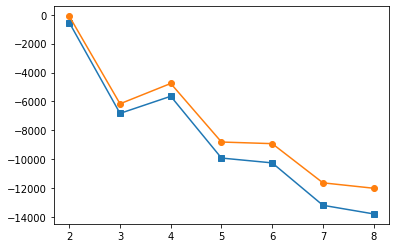

In [53]:
plt.plot(np.arange(2, 9), aic, marker = 's')
plt.plot(np.arange(2, 9), bic, marker = 'o')

## Regression coefficients of the two-segment mixture of linear regression models for the fast food data set



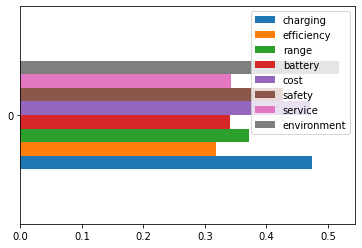

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(values, sentiments)

pd.DataFrame(lr.coef_.reshape(1,-1), columns=columns).plot(y=columns, kind='barh')
plt.show()

# Step 6: Profiling Segments


`If we draw a horizontal line that passes through longest distance without a horizontal line, we get 6 clusters as shown in the following figure:`

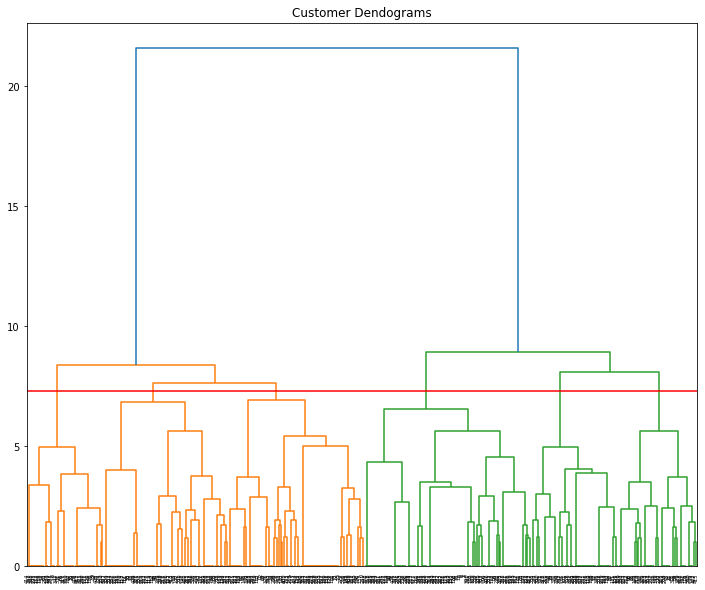

In [100]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(values, method='ward'))
plt.axhline(y = 7.3, color = 'r', linestyle = '-')
plt.show()

In [135]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(values)

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

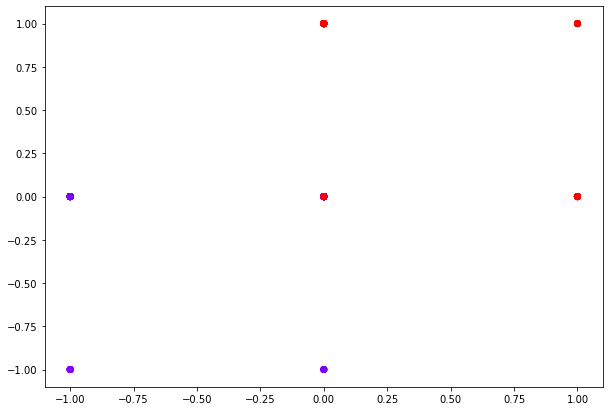

In [136]:
plt.figure(figsize=(10, 7))
plt.scatter(values[:,0], values[:,1], c=cluster.labels_, cmap='rainbow')

# Step 7: Describing Segments


In [31]:
from statsmodels.graphics.mosaicplot import mosaic

kmeans = KMeans(5, random_state=0).fit(values)

crosstabLike = pd.crosstab(kmeans.labels_, df['sentiment'])


In [104]:
from statsmodels.graphics.mosaicplot import mosaic
kmeans = KMeans(6, random_state=0).fit(values)
crosstabLike = pd.crosstab(kmeans.labels_, sentiments)

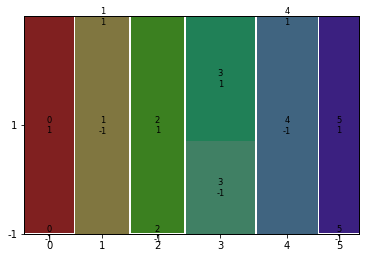

In [105]:
mosaic(crosstabLike.stack())
plt.show()

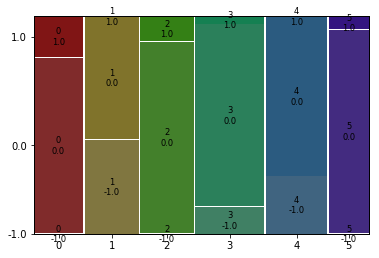

In [106]:
# Gender battery
crosstabGender = pd.crosstab(kmeans.labels_, df['battery'])
mosaic(crosstabGender.stack())
plt.show()



# Step 8: Selecting (the) Target Segment(s)

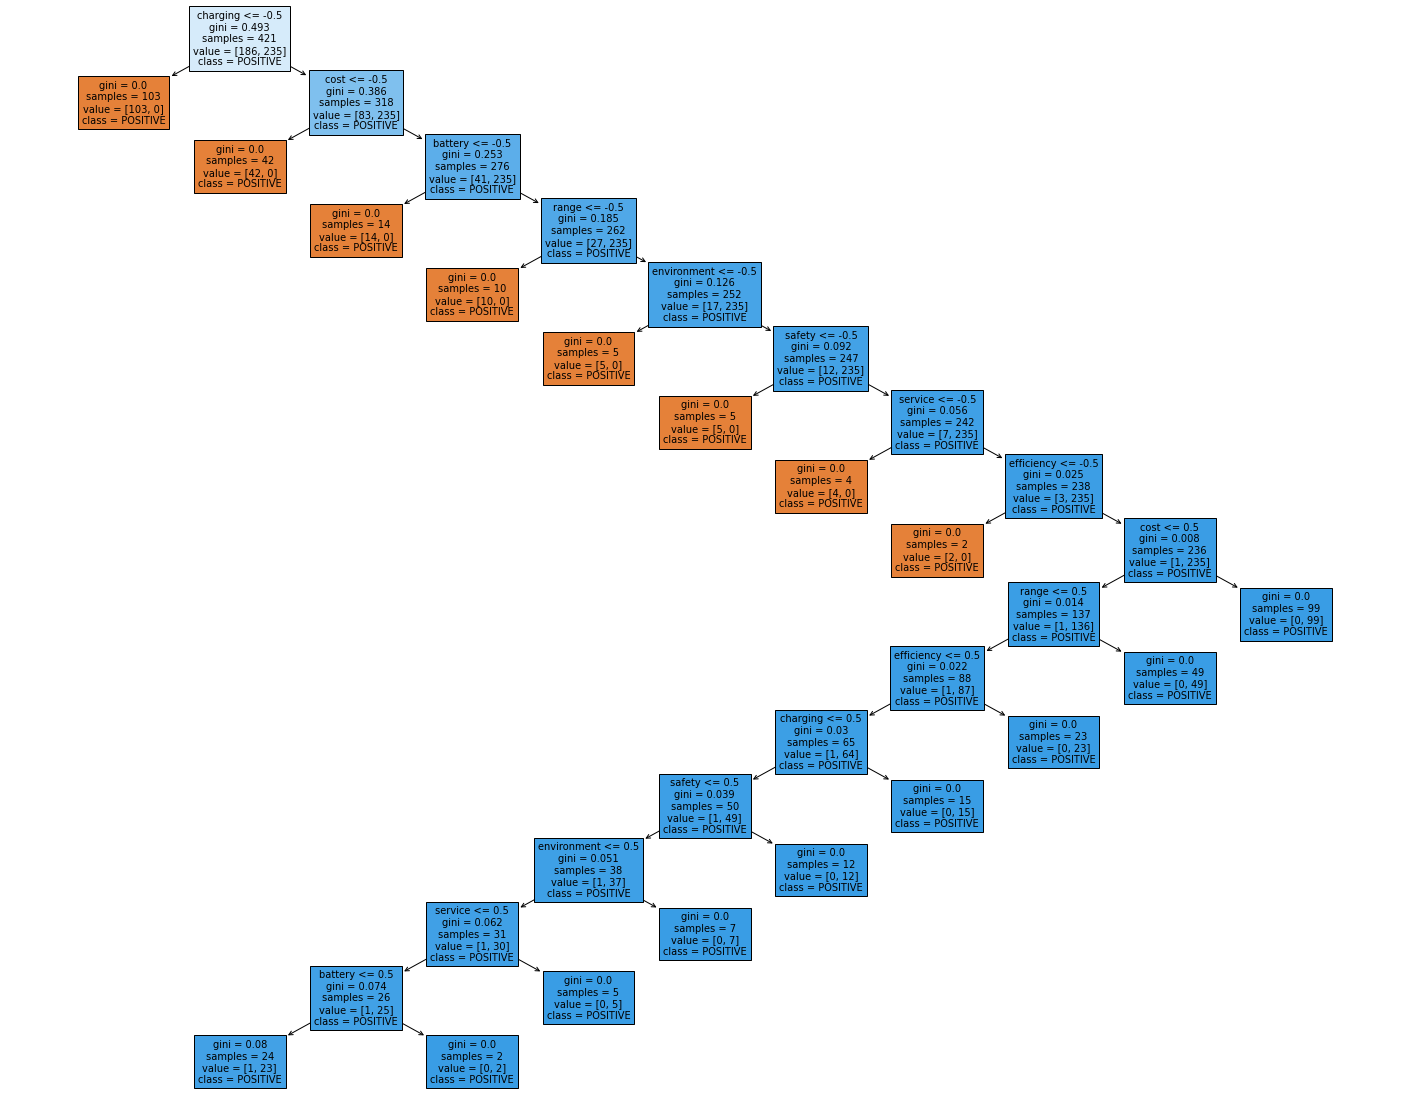

In [130]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree = DecisionTreeClassifier()
dtree.fit(values, sentiments)



fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtree, 
                   feature_names=columns,  
                   class_names=df["sentiment"],
                   filled=True)

In [76]:
df['KmeansLabels'] = kmeans.labels_

In [ ]:


visited = df.groupby('KmeansLabels')['NumVisitFrequency'].mean()
visited = visited.to_frame().reset_index()

Liked = df.groupby('KmeansLabels')['LikeNumber'].mean()
Liked = Liked.to_frame().reset_index()

gender = df.groupby('KmeansLabels')['Gender'].mean()
gender = gender.to_frame().reset_index()

